Counts of Subtypes by Follow-Up Status:
Label         Subtype I  Subtype II  Ambiguous
follow-up                                     
No Follow-Up         36          31          7
Follow-Up            31          47          8 

Chi-square test for membership proportions (>0.5 vs ≤0.5):

Cluster 1:
Cluster 1 Membership > 0.5  False  True 
Follow-Up Status                        
Follow-Up                      52     34
No Follow-Up                   34     40
Chi2 = 2.814, p-value = 0.093

Cluster 2:
Cluster 2 Membership > 0.5  False  True 
Follow-Up Status                        
Follow-Up                      34     52
No Follow-Up                   40     34
Chi2 = 2.814, p-value = 0.093

Mann–Whitney U test for membership distributions (Membership > 0.5):

Cluster 1: U = 593.000, p-value = 0.348

Cluster 2: U = 916.000, p-value = 0.781


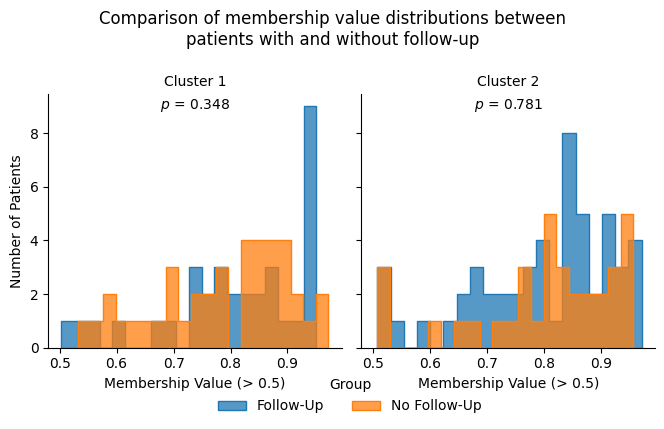

In [1]:
# -*- coding: utf-8 -*-
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu

def main():
    # 1. Read the Excel file
    df = pd.read_excel('FCM基线160人.xlsx')

    # 2. Compute counts for each Label in follow-up vs no follow-up
    #    Label: 0 = Subtype I, 1 = Subtype II, 3 = Ambiguous
    counts = df.groupby('follow-up')['Label'].value_counts().unstack(fill_value=0)
    counts.index = counts.index.map({0: 'No Follow-Up', 1: 'Follow-Up'})
    counts = counts.rename(columns={0: 'Subtype I', 1: 'Subtype II', 3: 'Ambiguous'})
    print('Counts of Subtypes by Follow-Up Status:')
    print(counts, '\n')

    # 2a. Chi-square tests for membership >0.5 vs ≤0.5 in each cluster
    print('Chi-square test for membership proportions (>0.5 vs ≤0.5):')
    for cluster in ['Cluster 1', 'Cluster 2']:
        ct = pd.crosstab(
            df['follow-up'].map({0: 'No Follow-Up', 1: 'Follow-Up'}),
            df[cluster] > 0.5,
            rownames=['Follow-Up Status'],
            colnames=[f'{cluster} Membership > 0.5']
        )
        chi2, p, dof, expected = chi2_contingency(ct)
        print(f'\n{cluster}:')
        print(ct)
        print(f'Chi2 = {chi2:.3f}, p-value = {p:.3f}')

    # 3. Prepare data for membership distribution comparison (include all labels)
    df_long = pd.melt(
        df,
        id_vars=['follow-up'],
        value_vars=['Cluster 1', 'Cluster 2'],
        var_name='Cluster',
        value_name='Membership'
    )
    df_long['Group'] = df_long['follow-up'].map({0: 'No Follow-Up', 1: 'Follow-Up'})

    # 3a. Filter to only membership values > 0.5
    df_long = df_long[df_long['Membership'] > 0.5]

    # 3b. Mann–Whitney U tests for membership distributions (>0.5) by cluster
    p_values = {}
    print('\nMann–Whitney U test for membership distributions (Membership > 0.5):')
    for cluster in ['Cluster 1', 'Cluster 2']:
        grp_no = df.loc[df['follow-up'] == 0, cluster]
        grp_no = grp_no[grp_no > 0.5]
        grp_yes = df.loc[df['follow-up'] == 1, cluster]
        grp_yes = grp_yes[grp_yes > 0.5]
        u_stat, p_val = mannwhitneyu(grp_no, grp_yes, alternative='two-sided')
        p_values[cluster] = p_val
        print(f'\n{cluster}: U = {u_stat:.3f}, p-value = {p_val:.3f}')

    # 4. Plot membership value distribution for follow-up vs no follow-up
    g = sns.FacetGrid(
        df_long,
        col='Cluster',
        hue='Group',
        sharex=True,
        sharey=True,
        height=4,
        aspect=1
    )
    # Set overall figure size to 8×5 inches
    g.fig.set_size_inches(4, 4)

    g.map(
        sns.histplot,
        'Membership',
        bins=20,
        element='step',
        stat='count',
        common_norm=False
    )
    # Annotate p-values below each facet
    for ax, cluster in zip(g.axes.flat, ['Cluster 1', 'Cluster 2']):
        p_val = p_values[cluster]
        ax.text(
            0.5, 0.99,
            f'$p$ = {p_val:.3f}',
            ha='center', va='top',
            transform=ax.transAxes,
            fontsize=10
        )
    g.add_legend(loc='upper right', bbox_to_anchor=(0.74, 0.1), ncol=2)
    g.set_axis_labels('Membership Value (> 0.5)', 'Number of Patients')
    g.set_titles(col_template='{col_name}')
    plt.suptitle('Comparison of membership value distributions between\npatients with and without follow-up', y=0.99)
    plt.tight_layout()

    # 5. Save and show figure
    plt.savefig('membership_distribution_by_groupx.jpg', dpi=1200, bbox_inches='tight')
    plt.show()


if __name__ == '__main__':
    main()

Counts of Subtypes by Follow-Up Status:
Label         Subtype I  Subtype II  Ambiguous
follow-up                                     
No Follow-Up         36          31          7
Follow-Up            31          47          8

Chi-square test on subtype counts by follow-up status:
  Chi2 = 2.8378
  p-value = 0.2420
  Degrees of freedom = 2
  Expected frequencies:
Label         Subtype I  Subtype II  Ambiguous
follow-up                                     
No Follow-Up    30.9875      36.075     6.9375
Follow-Up       36.0125      41.925     8.0625



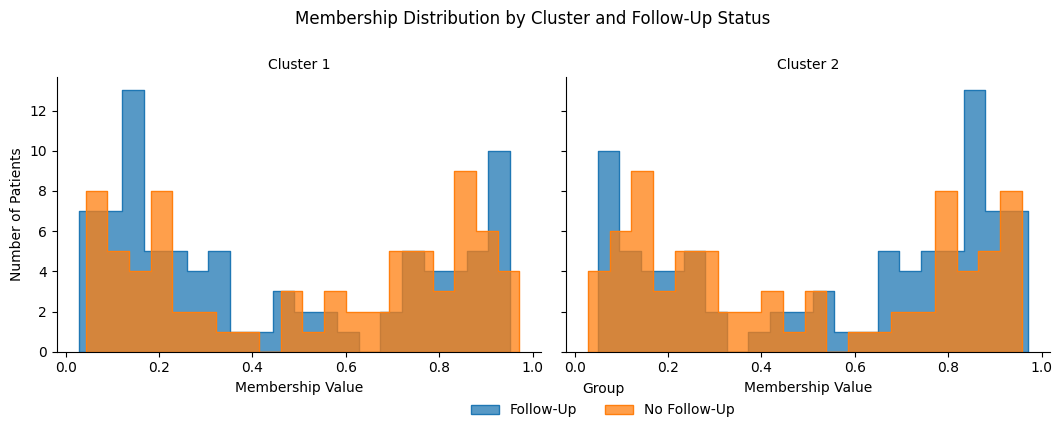

In [36]:
# -*- coding: utf-8 -*-
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

def main():
    # 1. Read the Excel file
    df = pd.read_excel('FCM基线160人.xlsx')

    # 2. Compute counts for each Label in follow-up vs no follow-up
    #    Label: 0 = Subtype I, 1 = Subtype II, 3 = Ambiguous
    counts = df.groupby('follow-up')['Label'].value_counts().unstack(fill_value=0)
    # Map follow-up codes and column names
    counts.index = counts.index.map({0: 'No Follow-Up', 1: 'Follow-Up'})
    counts = counts.rename(columns={0: 'Subtype I', 1: 'Subtype II', 3: 'Ambiguous'})

    print('Counts of Subtypes by Follow-Up Status:')
    print(counts)
    print()

    # 3. Chi-square test on the contingency table
    chi2, p, dof, expected = chi2_contingency(counts)
    print('Chi-square test on subtype counts by follow-up status:')
    print(f'  Chi2 = {chi2:.4f}')
    print(f'  p-value = {p:.4f}')
    print(f'  Degrees of freedom = {dof}')
    print('  Expected frequencies:')
    expected_df = pd.DataFrame(expected, index=counts.index, columns=counts.columns)
    print(expected_df)
    print()

    # 4. Prepare data for membership distribution comparison (include all labels)
    df_long = pd.melt(
        df,
        id_vars=['follow-up'],
        value_vars=['Cluster 1', 'Cluster 2'],
        var_name='Cluster',
        value_name='Membership'
    )
    df_long['Group'] = df_long['follow-up'].map({0: 'No Follow-Up', 1: 'Follow-Up'})

    # 5. Plot membership value distribution for follow-up vs no follow-up
    g = sns.FacetGrid(
        df_long,
        col='Cluster',
        hue='Group',
        sharex=True,
        sharey=True,
        height=4,
        aspect=1
    )
    g.map(
        sns.histplot,
        'Membership',
        bins=20,
        element='step',
        stat='count',
        common_norm=False
    )
    g.add_legend(loc='upper right', bbox_to_anchor=(0.7, 0.1), ncol=2)
    g.set_axis_labels('Membership Value', 'Number of Patients')
    g.set_titles(col_template='{col_name}')
    plt.suptitle('Membership Distribution by Cluster and Follow-Up Status', y=1)
    plt.tight_layout()

    # 6. Save and show the figure
    plt.savefig('membership_distribution_by_group.png', dpi=600, bbox_inches='tight')
    plt.show()

if __name__ == '__main__':
    main()